In [4]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import scale


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
aus_house_df = pd.read_csv("train.csv")

In [3]:
aus_house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking shape of dataset
aus_house_df.shape


(1460, 81)

In [5]:
#checking info of dataset
aus_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = aus_house_df.isnull().sum()/len(aus_house_df)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
#Categorical Variables
categorical_columns = aus_house_df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
#Categorical Variables with Null
categorical_columns_with_null = categorical_columns.isnull().sum()[categorical_columns.isnull().sum()>0]
categorical_columns_with_null.index

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [9]:
# 'NotAvailable' in case of NA for Categorical Variable with Null Values.
for col in (categorical_columns_with_null.index):    
    aus_house_df[col]=aus_house_df[col].fillna('NotAvailable')

In [10]:
# Dropping the categorical columns is having same values 85% and more.
for col in (categorical_columns):
    if(aus_house_df[col].value_counts().max() >= 1241):
        aus_house_df.drop(col, axis = 1, inplace = True)

In [11]:
aus_house_df.shape

(1460, 60)

In [12]:

numerical_columns = aus_house_df.select_dtypes(include=['int64','float'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
#numerical_columns_with_null = numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]
#numerical_columns_with_null.index
numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
aus_house_df.LotFrontage.median()

69.0

In [15]:
aus_house_df['GarageYrBlt'] = aus_house_df['GarageYrBlt'].fillna(0)
aus_house_df['GarageYrBlt'] = aus_house_df['GarageYrBlt'].astype(int)

In [16]:
numerical_columns = aus_house_df.select_dtypes(include=['int64','float'])
numerical_columns_with_null = numerical_columns.isnull().sum()[numerical_columns.isnull().sum()>0]
numerical_columns_with_null.index

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [17]:
# Numerical variables missing value filled with median.
for col in (numerical_columns_with_null.index):
    aus_house_df[col] = aus_house_df[col].fillna(aus_house_df[col].median())  
    

In [18]:
# Dropping the Numerical columns is having same values 85% and more.
for col in (numerical_columns):
    if(aus_house_df[col].value_counts().max() >= 1241):
        aus_house_df.drop(col, axis = 1, inplace = True)

In [19]:

null_data = aus_house_df[aus_house_df.isnull().any(axis=1)]
null_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice


In [20]:
# Adding a new column for Building Age

def calAgeOfBuilding(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
aus_house_df['AgeOfBuilding'] = aus_house_df.apply(calAgeOfBuilding, axis=1)
aus_house_df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,AgeOfBuilding
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,NotAvailable,2,2008,Normal,208500,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,NotAvailable,5,2007,Normal,181500,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,NotAvailable,9,2008,Normal,223500,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,NotAvailable,2,2006,Abnorml,140000,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,NotAvailable,12,2008,Normal,250000,8


In [21]:
# Dropping the colums as we have derived required columns. 
# In additionn with this dropping 'MoSold' as month will not be that much impact var.
aus_house_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','MoSold'], axis = 1, inplace = True)

In [22]:
aus_house_df.shape

(1460, 48)

In [23]:
aus_house_df.drop(['Id'], axis = 1, inplace = True)

In [24]:
aus_house_df.shape

(1460, 47)

In [25]:
numerical_columns = aus_house_df.select_dtypes(include=['int64','float'])
numerical_columns.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfBuilding
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,3,8,0,2,548,0,61,208500,5
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,3,6,1,2,460,298,0,181500,31
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,3,6,1,2,608,0,42,223500,6
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,3,7,1,3,642,0,35,140000,36
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,4,9,1,3,836,192,84,250000,8


# Data Visualisation-Univariate and Bivariate Analysis

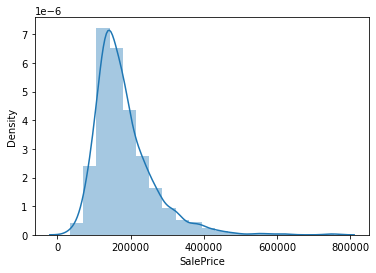

In [26]:
sns.distplot(aus_house_df['SalePrice'], bins=20)
plt.show()

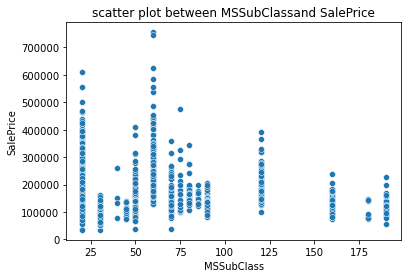

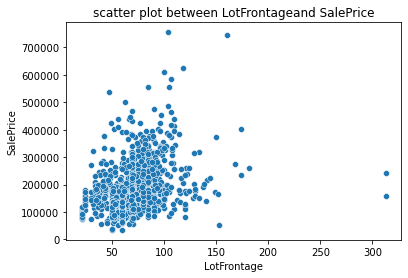

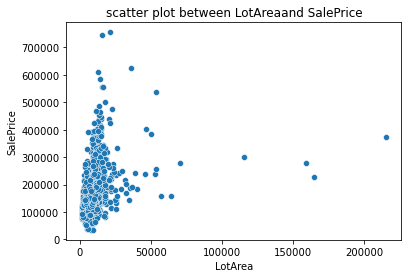

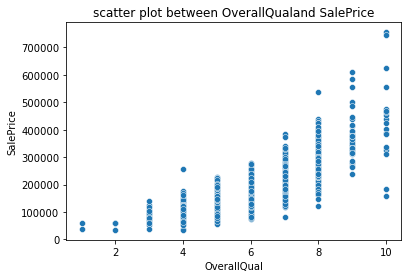

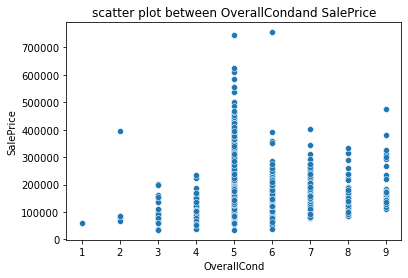

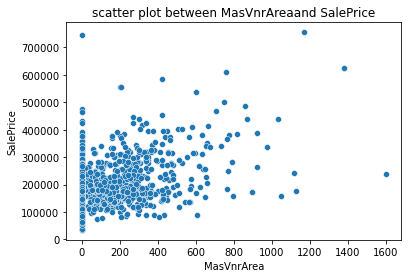

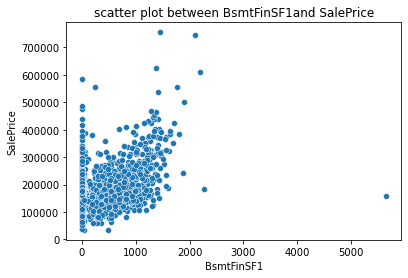

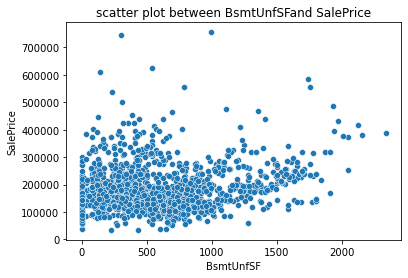

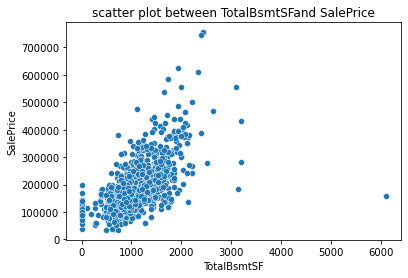

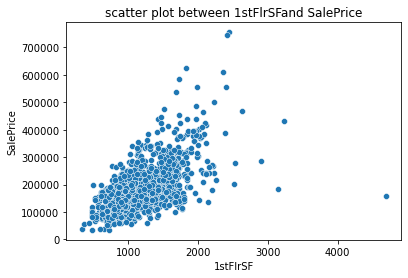

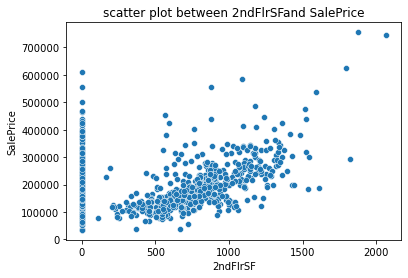

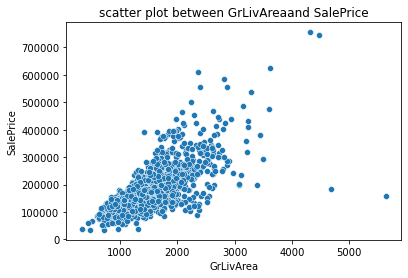

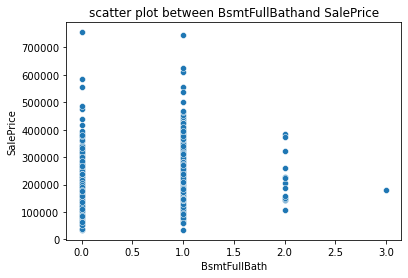

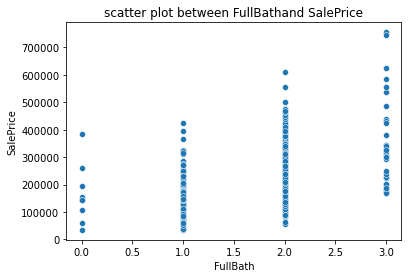

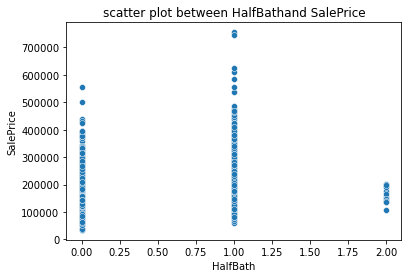

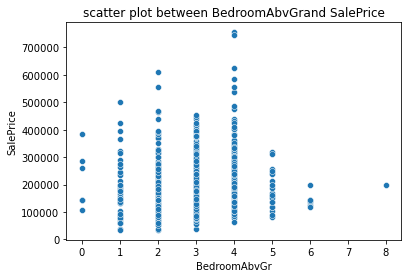

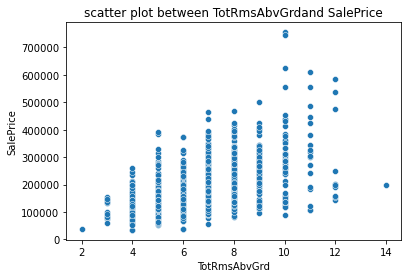

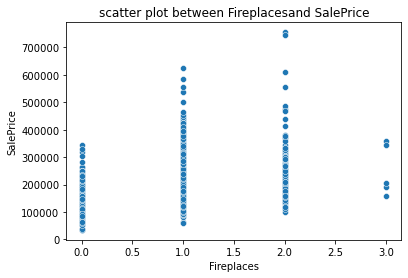

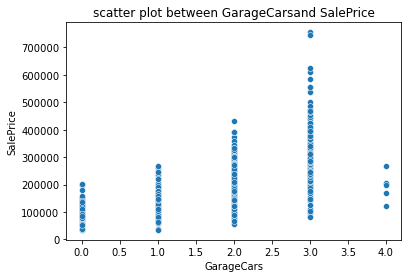

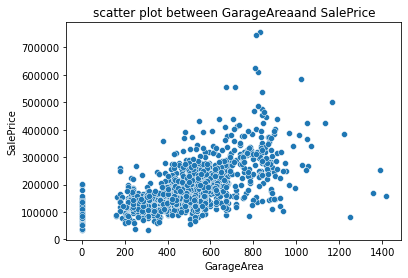

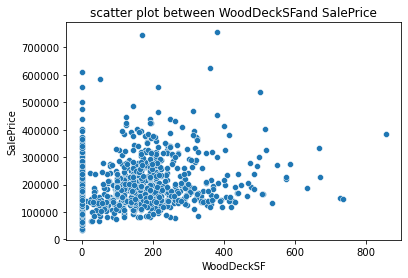

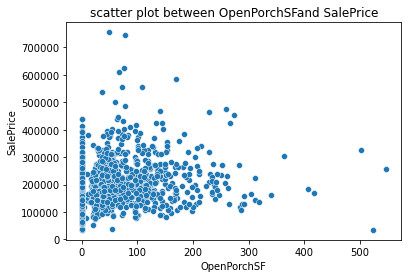

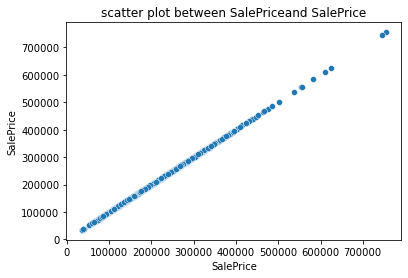

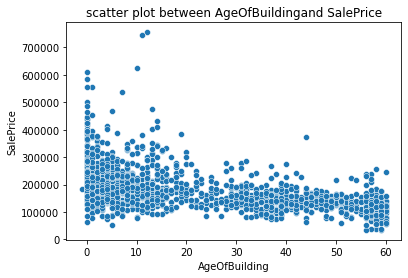

In [27]:
for i in numerical_columns:
    sns.scatterplot(aus_house_df[i], aus_house_df['SalePrice'])
    plt.title('scatter plot between '+i +'and SalePrice')
    plt.show()

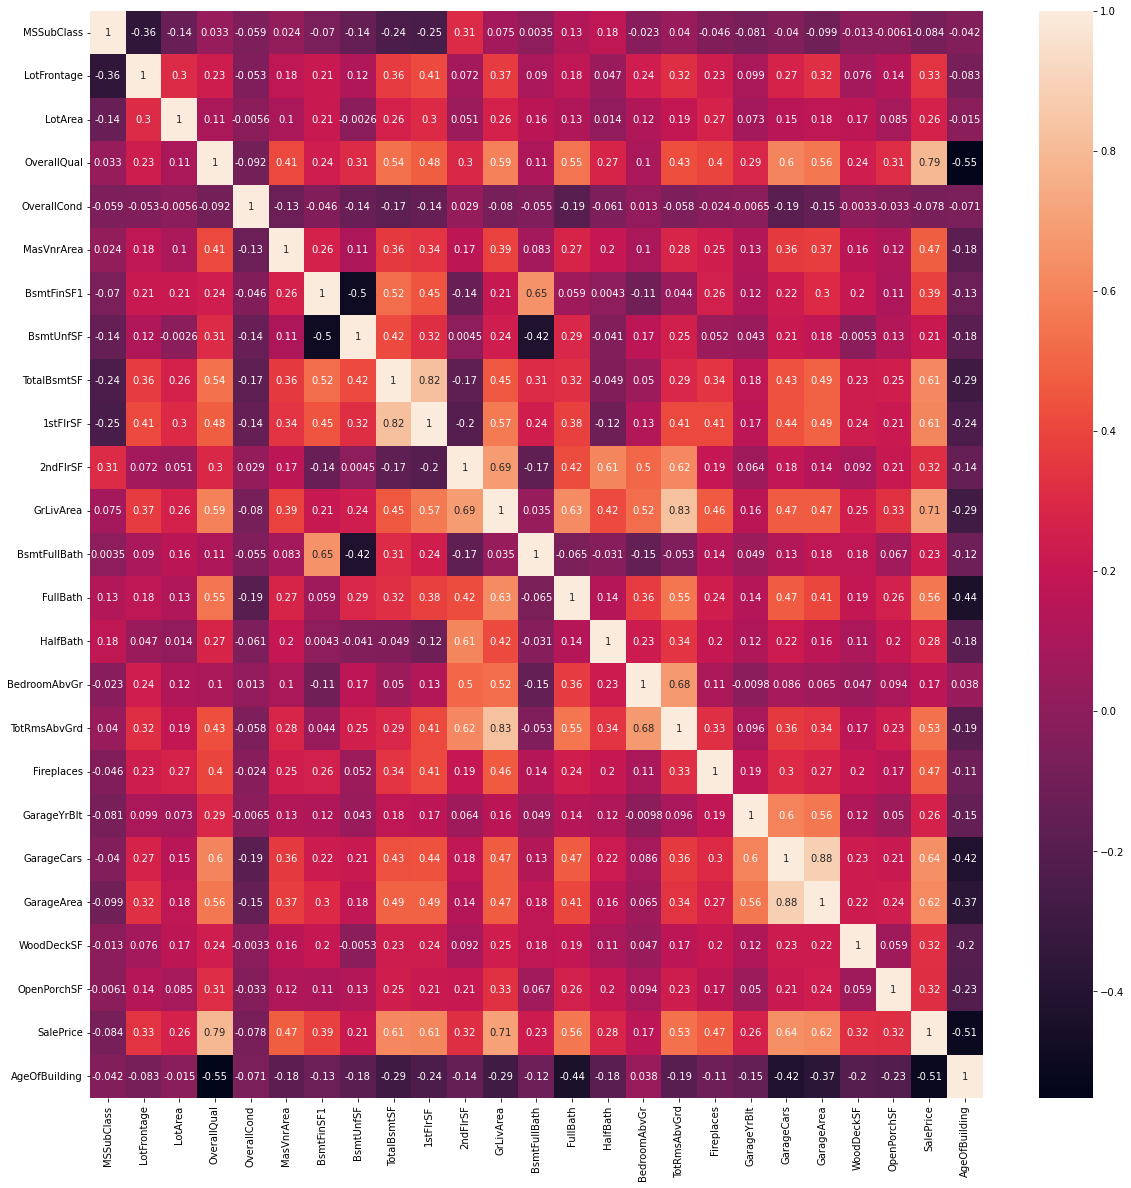

In [28]:
plt.figure(figsize = (20, 20))
sns.heatmap(aus_house_df.corr(), annot = True)
plt.show()

In [29]:
#High Correlation Observed :
# 'GrLivArea' vs 'TotRmsAbvGrd' : 83%
# 'GarageArea' vs 'GarageCars'  : 89%
#Removing High correlated variable.
aus_house_df.drop(['TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

# Step 4: Data Preparation - Creating Dummy Variables

In [30]:
house_categorical = aus_house_df.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,No,GLQ,Ex,Gd,NotAvailable,Attchd,RFn,NotAvailable,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,...,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,NotAvailable,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,NotAvailable,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,...,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,NotAvailable,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,NotAvailable,Normal


In [31]:
house_numerical = aus_house_df.select_dtypes(include=['int64','float'])
house_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfBuilding
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,2,1,3,0,548,0,61,208500,5
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,2,0,3,1,460,298,0,181500,31
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,2,1,3,1,608,0,42,223500,6
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,1,0,3,1,642,0,35,140000,36
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,2,1,4,1,836,192,84,250000,8


In [32]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NotAvailable,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
dummies1 = pd.get_dummies(aus_house_df['MSSubClass'], prefix='MSSubClass', drop_first = True)
dummies1.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
# drop categorical variables 

aus_house_df = aus_house_df.drop(list(house_categorical.columns), axis=1)

In [35]:
aus_house_df = aus_house_df.drop(['MSSubClass'],axis=1)

In [36]:
aus_house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeOfBuilding
0,65.0,8450,7,5,196.0,706,150,856,856,854,...,2,1,3,0,2003,548,0,61,208500,5
1,80.0,9600,6,8,0.0,978,284,1262,1262,0,...,2,0,3,1,1976,460,298,0,181500,31
2,68.0,11250,7,5,162.0,486,434,920,920,866,...,2,1,3,1,2001,608,0,42,223500,6
3,60.0,9550,7,5,0.0,216,540,756,961,756,...,1,0,3,1,1998,642,0,35,140000,36
4,84.0,14260,8,5,350.0,655,490,1145,1145,1053,...,2,1,4,1,2000,836,192,84,250000,8


In [37]:
# concat dummy variables with X
aus_house_df= pd.concat([aus_house_df, house_dummies], axis=1)

In [38]:
aus_house_df.shape

(1460, 158)

In [39]:
aus_house_df= pd.concat([aus_house_df, dummies1], axis=1)

In [40]:
aus_house_df.shape

(1460, 172)

# Splitting the data

In [41]:
aus_house_df_train, aus_house_df_test = train_test_split(aus_house_df, train_size = 0.7, random_state = 100)

In [42]:
# We will use Min Max Scaling for our purpose
scaler = MinMaxScaler()    #Instantiating the object
cols = aus_house_df_train.columns
aus_house_df_train[cols] = scaler.fit_transform(aus_house_df_train[cols])
cols = aus_house_df_test.columns
aus_house_df_test[cols] = scaler.transform(aus_house_df_test[cols])

In [43]:
aus_house_df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
318,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.154110,0.220458,0.231481,0.616949,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.274401,0.120295,0.098611,0.333656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.207620,0.079378,0.145602,0.307022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.332620,0.127169,0.202315,0.505569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
390,0.099315,0.032409,0.444444,0.875,0.00,0.042700,0.098031,0.140917,0.136343,0.196610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y_train = aus_house_df_train.pop('SalePrice')
X_train = aus_house_df_train
y_test = aus_house_df_test.pop('SalePrice')
X_test = aus_house_df_test

In [45]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.05632828569250889
[-7.23273422e-02  1.37900218e-01  1.15077155e-01  4.52662907e-02
  2.59181890e-02 -2.44849552e-02  1.39617739e-02  3.57977331e-04
  6.14909085e-02  1.20787096e-01  1.90296698e-01  3.49182257e-02
  4.15843576e-02  1.40937055e-02 -2.58718168e-03  1.12833794e-02
  5.59358032e-02  5.41347848e-02  1.60216118e-02 -1.31566775e-02
 -9.41935259e-03  1.97646665e-02  2.79945204e-02  2.70272927e-02
  2.77773266e-02  1.97527593e-03 -3.29559834e-02  3.01789996e-03
  1.08409877e-02 -2.08319945e-02 -2.70949331e-02 -1.89872588e-03
 -9.21383864e-03 -5.60194509e-03 -2.46003999e-03  3.50050112e-03
  3.68851667e-03  3.99642576e-02 -2.78575108e-02  9.27203960e-03
 -1.42062724e-02 -1.24100304e-02 -1.59914708e-02 -1.00323253e-02
  1.78716537e-02 -4.77290591e-03  8.41580208e-02  5.88946001e-02
 -2.08026802e-02 -9.02747794e-03 -9.34869510e-03  8.91510331e-03
  4.10152560e-02  5.35225015e-02 -2.73735128e-03  2.98375825e-02
 -9.26983489e+11 -3.44034242e+10 -4.01211587e-02 -2.84395928e-02
  5.

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8869551038529656
-1.6972728084133793e+23
1.391273048612026
9.249024869647176e+23
0.001362657246436852
2.1068393780517486e+21


Observation :If we fit a model using Linear regression R2 score of test data is negative and has high variance which clearly indicates Overfitting

# Ridge Regression

In [49]:
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
alphas=list(alphas)

In [50]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#params={'alpha':alphas}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [52]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.48027022e-02  5.45823702e-02  1.06170222e-01  3.83213469e-02
  3.12396116e-02  5.64509965e-03  2.11071402e-02  2.43883814e-02
  6.70675793e-02  1.04512544e-01  9.47065103e-02  3.33695777e-02
  4.84606463e-02  1.76948568e-02  7.60082939e-03  2.13315468e-02
 -1.02424027e-04  5.30915479e-02  1.91098673e-02 -6.49101247e-03
 -1.40395684e-02  9.17910240e-03  1.32662608e-02  1.49707719e-02
  1.17369153e-02  3.93594933e-03 -2.62191873e-02  1.37328076e-03
  1.35916744e-02 -1.84756568e-02 -1.56690165e-02 -1.38690178e-03
 -2.64245488e-03 -7.06987509e-03 -7.10675981e-03  1.75590489e-03
 -5.47030997e-03  3.00859433e-02 -3.21858573e-02 -3.87107270e-03
 -2.05144120e-02 -1.56020657e-02 -2.06520598e-02 -1.57622260e-02
  3.75861803e-03 -9.10135033e-03  7.48777825e-02  4.56296696e-02
 -2.37642323e-02 -1.39988560e-02 -1.60252593e-02 -2.43178789e-04
  2.80753596e-02  4.02136017e-02 -3.35840141e-03  1.86160320e-02
 -9.53758148e-03 -1.19006352e-02 -2.38163992e-02 -1.67623306e-02
  1.35649925e-02  2.49485

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003531,0.003111,0.001142,0.000937,0.0001,{'alpha': 0.0001},-0.028836,-0.030128,-0.031010,-0.027369,...,-0.029367,0.001230,24,-0.023414,-0.018808,-0.022118,-0.023521,-0.023178,-0.022208,0.001772
1,0.002506,0.002098,0.000798,0.000978,0.001,{'alpha': 0.001},-0.028814,-0.030124,-0.030958,-0.027348,...,-0.029346,0.001225,23,-0.023413,-0.018807,-0.022108,-0.023522,-0.023179,-0.022206,0.001772
2,0.006248,0.007653,0.003124,0.006248,0.01,{'alpha': 0.01},-0.028668,-0.030090,-0.030733,-0.027207,...,-0.029228,0.001221,22,-0.023398,-0.018812,-0.022056,-0.023519,-0.023180,-0.022193,0.001768
3,0.003124,0.006248,0.000000,0.000000,0.05,{'alpha': 0.05},-0.028371,-0.030007,-0.030507,-0.026883,...,-0.029010,0.001284,21,-0.023333,-0.018838,-0.022007,-0.023491,-0.023176,-0.022169,0.001746
4,0.003195,0.004114,0.003922,0.005917,0.1,{'alpha': 0.1},-0.028132,-0.029935,-0.030374,-0.026619,...,-0.028838,0.001347,20,-0.023263,-0.018853,-0.021982,-0.023454,-0.023165,-0.022143,0.001724


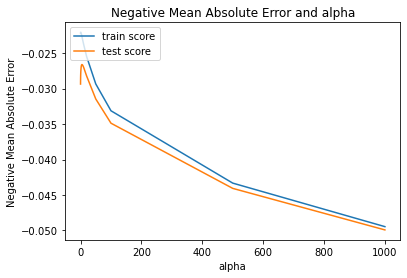

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8827865840156256
0.8570337324575932
1.4425761104924342
0.7790724964576825
0.0014129051033226583
0.0017746526115209168


In [56]:
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
3,OverallCond,0.106170
10,GrLivArea,0.104513
11,BsmtFullBath,0.094707
0,LotFrontage,0.076803
47,Neighborhood_NridgHt,0.074878
9,2ndFlrSF,0.067068
2,OverallQual,0.054582
18,WoodDeckSF,0.053092
13,HalfBath,0.048461
48,Neighborhood_OldTown,0.045630


In [57]:
#Lasso regression

In [58]:
lasso = Lasso()
#params1 = {'alpha': np.logspace(-2, 0.001, 100)}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020806,0.010993,0.004121,0.005865,0.0001,{'alpha': 0.0001},-0.024514,-0.028338,-0.028880,-0.023520,...,-0.026126,0.002118,1,-0.023192,-0.019622,-0.021863,-0.023346,-0.023533,-0.022311,0.001468
1,0.006248,0.007653,0.003124,0.006249,0.001,{'alpha': 0.001},-0.026736,-0.033285,-0.031527,-0.029226,...,-0.030523,0.002298,2,-0.029808,-0.027506,-0.028066,-0.029058,-0.029290,-0.028746,0.000839
2,0.004014,0.006054,0.000420,0.000840,0.01,{'alpha': 0.01},-0.050348,-0.057693,-0.052096,-0.047413,...,-0.052824,0.003838,3,-0.053276,-0.051045,-0.052946,-0.053289,-0.052068,-0.052525,0.000863
3,0.003391,0.001739,0.001202,0.000745,0.05,{'alpha': 0.05},-0.080067,-0.083171,-0.077650,-0.075051,...,-0.080014,0.003381,4,-0.080533,-0.078553,-0.080507,-0.080814,-0.079252,-0.079932,0.000876
4,0.012497,0.011690,0.000000,0.000000,0.1,{'alpha': 0.1},-0.080067,-0.083171,-0.077650,-0.075051,...,-0.080014,0.003381,4,-0.080533,-0.078553,-0.080507,-0.080814,-0.079252,-0.079932,0.000876


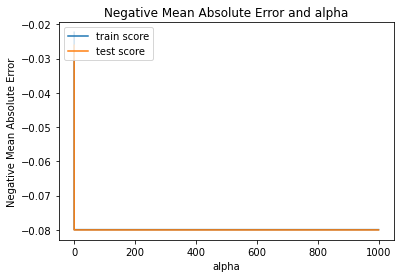

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [63]:
lasso.coef_

array([-1.05778494e-02,  6.02310556e-02,  1.38308215e-01,  3.62968565e-02,
        2.34425802e-02,  0.00000000e+00,  1.56712607e-02,  0.00000000e+00,
        0.00000000e+00,  6.90099926e-02,  2.25780350e-01,  3.24487220e-02,
        3.36260542e-02,  1.16279674e-02,  0.00000000e+00,  1.57344777e-02,
        0.00000000e+00,  5.09978239e-02,  1.60061190e-02, -4.23233965e-03,
       -1.31596653e-02,  0.00000000e+00,  0.00000000e+00,  6.49305133e-03,
       -0.00000000e+00,  2.29221771e-03, -2.36890478e-02,  1.95348562e-04,
        1.35911697e-02, -1.31144319e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.13550210e-03,
        0.00000000e+00,  3.30925156e-02, -2.49968802e-02,  0.00000000e+00,
       -1.11679996e-02, -0.00000000e+00, -1.13727100e-02, -9.09251334e-03,
        0.00000000e+00, -1.81920582e-03,  7.88485939e-02,  4.94537237e-02,
       -1.55269357e-02, -4.30702139e-03, -8.74761698e-03,  1.52263233e-03,
        3.06108231e-02,  

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8793793132544587
0.8593359414320627
1.4845102812591495
0.7665269657955265
0.001453976769107884
0.0017460750929283063


In [65]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_test.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(10)

,Coeff Values,Variables,Absolute Coefficent
10,0.225780,GrLivArea,0.225780
2,0.138308,OverallQual,0.138308
46,0.078849,Neighborhood_NoRidge,0.078849
9,0.069010,2ndFlrSF,0.069010
1,0.060231,LotArea,0.060231
17,0.050998,GarageArea,0.050998
47,0.049454,Neighborhood_NridgHt,0.049454
114,-0.042827,BsmtQual_Gd,0.042827
116,-0.042068,BsmtQual_TA,0.042068
131,-0.041278,KitchenQual_Fa,0.041278


In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.869551e-01,0.882787,0.879379
1,R2 Score (Test),-1.697273e+23,0.857034,0.859336
2,RSS (Train),1.391273e+00,1.442576,1.484510
3,RSS (Test),9.249025e+23,0.779072,0.766527
4,MSE (Train),3.691419e-02,0.037589,0.038131
5,MSE (Test),4.590032e+10,0.042127,0.041786


# Lets observe the changes in the coefficients after regularization

In [67]:
betas = pd.DataFrame(index=X_train.columns)

In [68]:
betas.rows = X_train.columns

In [69]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
betas.head(25)

,Linear,Ridge,Lasso
LotFrontage,-0.072327,-0.024803,-0.010578
LotArea,0.137900,0.054582,0.060231
OverallQual,0.115077,0.106170,0.138308
OverallCond,0.045266,0.038321,0.036297
MasVnrArea,0.025918,0.031240,0.023443
BsmtFinSF1,-0.024485,0.005645,0.000000
BsmtUnfSF,0.013962,0.021107,0.015671
TotalBsmtSF,0.000358,0.024388,0.000000
1stFlrSF,0.061491,0.067068,0.000000
2ndFlrSF,0.120787,0.104513,0.069010


__Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?__

__Ridge(alpha=2) Regression__
<br>
R2 score (train) : 0.882787

<br>
R2 score (test) : 0.857034

__Lasso(alpha=0.0001) Regression__
<br>
R2 score (train) : 0.879379
<br>
R2 score (test) : 0.859336

__1: Double the values of Alpha for lasso & Ridge__

In [71]:
#earlier for Ridge alpha = 5 now take 10
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8667883727493249
0.8480434447710741


In [72]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#print(lasso.coef_)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8711048757788364
0.8542787299702354


__Observation:As alpha value increased more feautrues removed from model but also a r2score is also dropped in both test and train data__

# Drop the Top 5 features and rebuild lasso

In [73]:
#Drop 5 features
X_train_new = X_train.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NoRidge', '2ndFlrSF'
                               , 'LotArea'], axis=1)

In [74]:
X_test_new = X_test.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NoRidge', '2ndFlrSF'
                               , 'LotArea'], axis=1)

In [75]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [77]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [78]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8504955321376908
0.847821586829606


In [79]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_test_new.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head()

,Coeff Values,Variables,Absolute Coefficent
6,0.217348,1stFlrSF,0.217348
8,0.078467,FullBath,0.078467
2,0.077965,MasVnrArea,0.077965
13,0.069680,GarageArea,0.069680
34,-0.053388,Neighborhood_Edwards,0.053388


__Observation:Next top 5 features observed are 1stFlrSF,FullBath,MasVnrArea,GarageArea,Neighborhood_Edwards	

In [5]:
np.version.version


'1.21.5'

In [7]:
pd. __version__ 

'1.4.2'

In [8]:
pip show seaborn

Name: seabornNote: you may need to restart the kernel to use updated packages.
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\user\anaconda3\lib\site-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: 



In [9]:
pip show matplotlib Name

Name: matplotlibNote: you may need to restart the kernel to use updated packages.
Version: 3.5.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\user\anaconda3\lib\site-packages
Requires: pillow, kiwisolver, numpy, fonttools, cycler, pyparsing, python-dateutil, packaging
Required-by: seaborn

